In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drw-crypto-market-prediction/sample_submission.csv
/kaggle/input/drw-crypto-market-prediction/train.parquet
/kaggle/input/drw-crypto-market-prediction/test.parquet


In [2]:
df_train = pd.read_parquet("/kaggle/input/drw-crypto-market-prediction/train.parquet")
df_test = pd.read_parquet("/kaggle/input/drw-crypto-market-prediction/test.parquet")

In [3]:
submission = pd.read_csv("/kaggle/input/drw-crypto-market-prediction/sample_submission.csv")



In [4]:
df_train.shape

(525886, 786)

In [5]:
df_train.head(5)

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X772,X773,X774,X775,X776,X777,X778,X779,X780,label
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.181844,-0.637860,0.006652,0.136870,0.116698,...,0.333753,-0.009992,-0.695595,-0.444077,-0.191238,-0.184251,-0.471897,-0.625428,-0.553991,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.489497,-0.075619,0.431594,0.522400,0.475255,...,0.333657,-0.010040,-0.696226,-0.452866,-0.200082,-0.188929,-0.472842,-0.625832,-0.554426,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.260121,-0.444684,0.100695,0.224729,0.203282,...,0.333667,-0.010037,-0.696832,-0.461383,-0.208786,-0.193571,-0.473785,-0.626236,-0.554860,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.099976,-0.666728,-0.123858,0.019197,0.014459,...,0.333174,-0.010279,-0.697391,-0.469628,-0.217350,-0.198175,-0.474726,-0.626639,-0.555294,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.270893,-0.325973,0.116336,0.234311,0.214073,...,0.333171,-0.010283,-0.697940,-0.477622,-0.225780,-0.202745,-0.475666,-0.627043,-0.555728,0.362452


In [6]:
df_test.shape

(538150, 786)

In [7]:
df_test.head()

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X772,X773,X774,X775,X776,X777,X778,X779,X780,label
ID,,,,,,,,,,,,,,,,,,,,,
1,0.317,8.102,13.164,10.272,23.436,-0.341229,0.041851,-0.020094,-0.206221,-0.297124,...,-0.147911,-0.043417,1.521787,1.548965,1.495735,1.166730,0.281056,-0.187831,-0.599553,0
2,2.608,2.111,123.562,40.163,163.725,-1.029564,-1.382505,-1.214935,-1.020241,-0.960397,...,-0.126703,-0.077090,-0.703054,-0.716951,-0.721292,-0.674619,-0.639318,-0.736268,-0.862220,0
3,2.768,10.787,126.137,118.266,244.403,-2.594090,-5.486158,-4.744466,-3.930152,-3.275324,...,-0.147750,-0.030627,-0.703514,-0.717525,-0.731701,-0.750998,-0.789366,-0.850941,-1.033131,0
4,0.948,12.157,16.069,31.723,47.792,0.240745,0.997585,1.028965,1.081052,0.811895,...,-0.136737,-0.033380,1.521167,1.551771,1.582833,1.625830,1.762155,1.911924,1.962445,0
5,1.084,3.493,32.679,37.327,70.006,0.067189,0.772852,0.772152,0.714846,0.514422,...,-0.218991,-0.004915,-0.703161,-0.716900,-0.714699,-0.652209,-0.623165,-0.699887,-0.640094,0


In [8]:
print("\nTrain columns and data types:")
print(df_train.dtypes)

print("\nTest columns and data types:")
print(df_test.dtypes)


Train columns and data types:
bid_qty     float64
ask_qty     float64
buy_qty     float64
sell_qty    float64
volume      float64
             ...   
X777        float64
X778        float64
X779        float64
X780        float64
label       float64
Length: 786, dtype: object

Test columns and data types:
bid_qty     float64
ask_qty     float64
buy_qty     float64
sell_qty    float64
volume      float64
             ...   
X777        float64
X778        float64
X779        float64
X780        float64
label         int64
Length: 786, dtype: object


In [9]:
#  Check for missing values
print("\nMissing values in train data:")
print(df_train.isnull().sum())

print("\nMissing values in test data:")
print(df_test.isnull().sum())


Missing values in train data:
bid_qty     0
ask_qty     0
buy_qty     0
sell_qty    0
volume      0
           ..
X777        0
X778        0
X779        0
X780        0
label       0
Length: 786, dtype: int64

Missing values in test data:
bid_qty     0
ask_qty     0
buy_qty     0
sell_qty    0
volume      0
           ..
X777        0
X778        0
X779        0
X780        0
label       0
Length: 786, dtype: int64


In [10]:
import warnings
warnings.filterwarnings('ignore')


# statistics summary
print("\nTrain data statistics:")
print(df_train.describe())

print("\nTest data statistics:")
print(df_test.describe())


Train data statistics:
             bid_qty        ask_qty        buy_qty       sell_qty  \
count  525886.000000  525886.000000  525886.000000  525886.000000   
mean        9.967948      10.174161     131.712690     132.660088   
std        15.645712      15.889598     307.184897     309.728730   
min         0.001000       0.001000       0.000000       0.000000   
25%         2.634000       2.678000      26.407000      27.020250   
50%         6.415000       6.538000      57.015000      58.044500   
75%        13.085000      13.330000     127.626000     129.100500   
max      1114.932000    1352.965000   17609.567000   17685.503000   

              volume             X1             X2             X3  \
count  525886.000000  525886.000000  525886.000000  525886.000000   
mean      264.372778      -0.033823      -0.000269      -0.000307   
std       588.457585       0.912125       0.937410       0.933608   
min         0.000000      -4.746617      -8.953153      -7.410052   
25%      

# Univariate Analysis (Feature Distributions)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

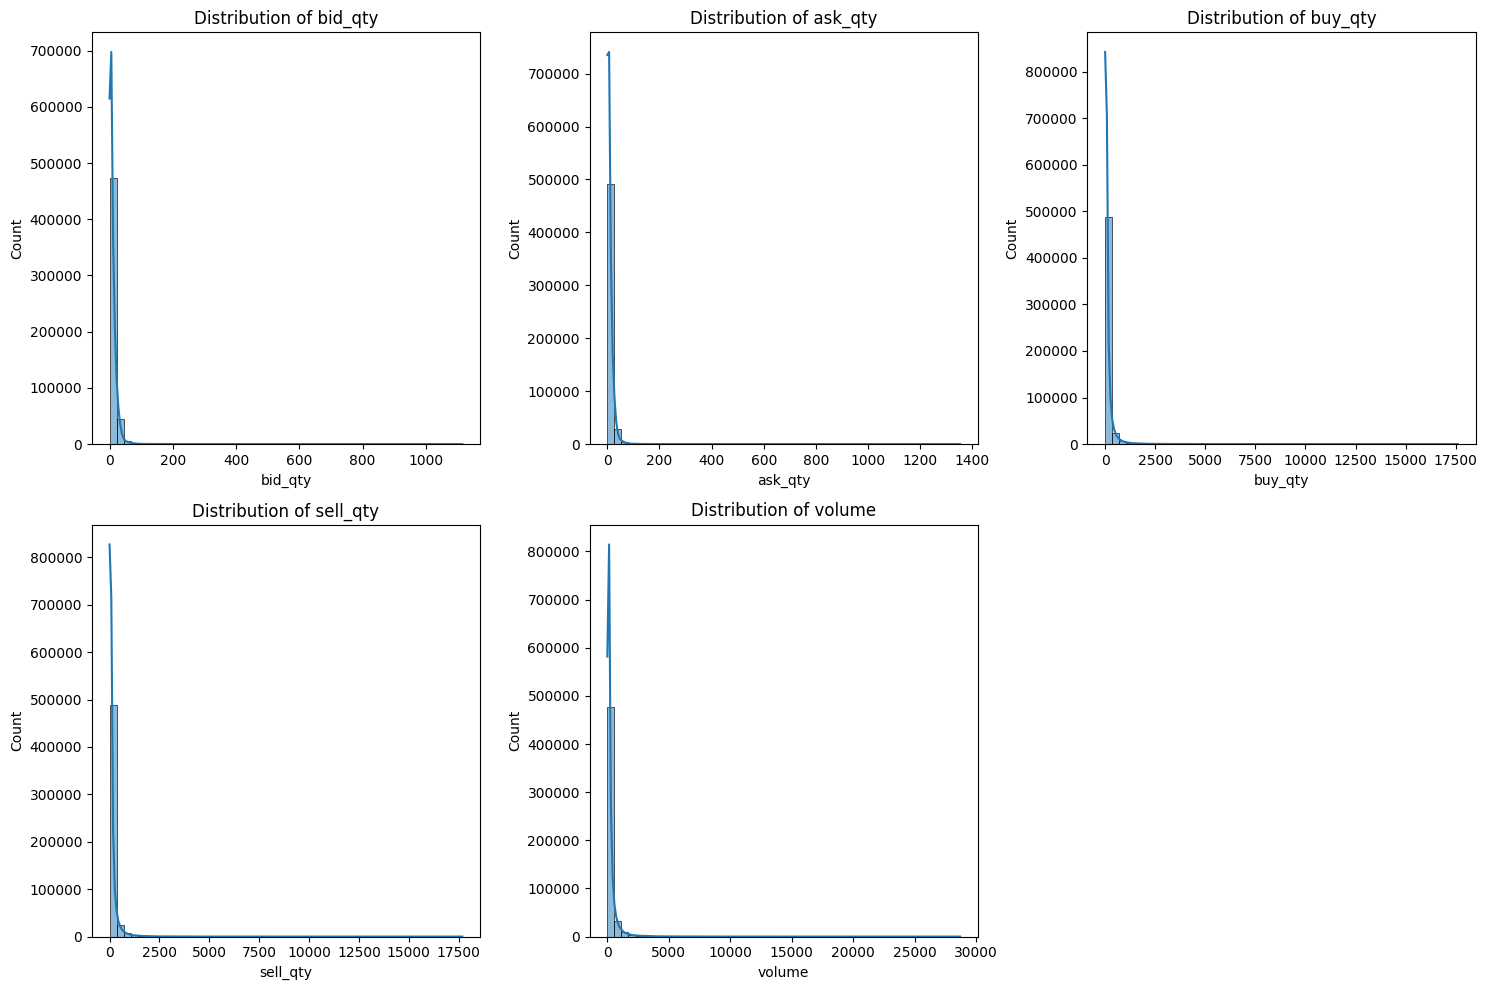

In [12]:
public_features = ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(public_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_train[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


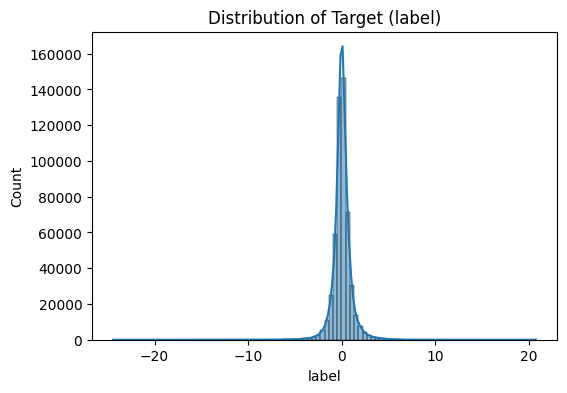

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df_train['label'], bins=100, kde=True)
plt.title('Distribution of Target (label)')
plt.show()


# Bivariate Analysis (Feature vs Target)

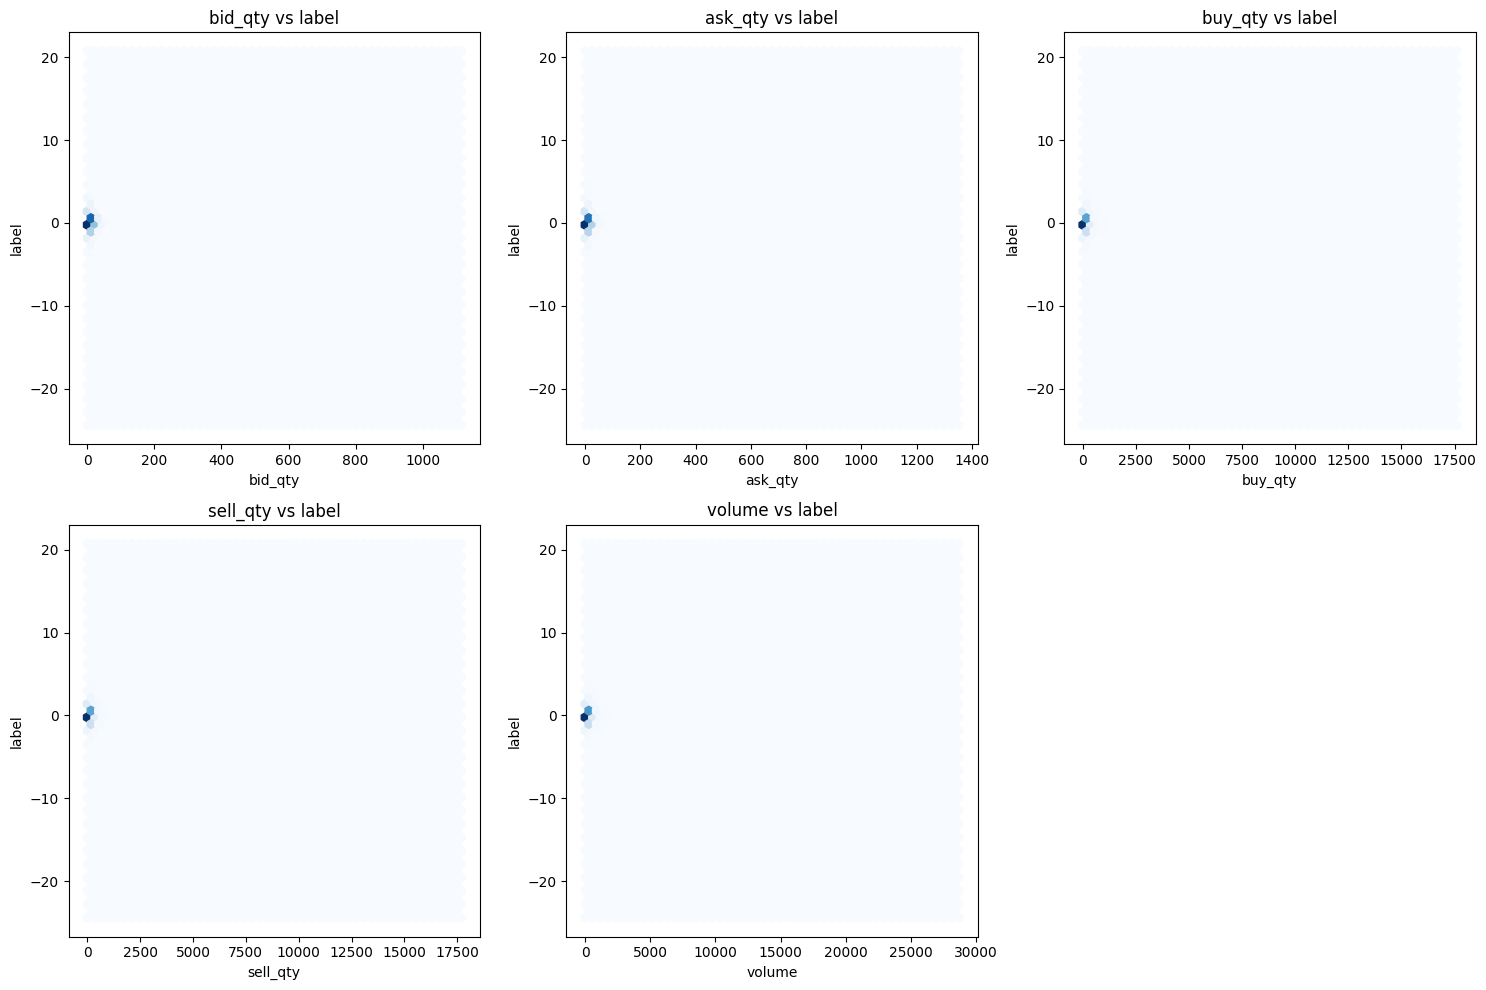

In [14]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(public_features, 1):
    plt.subplot(2, 3, i)
    plt.hexbin(df_train[feature], df_train['label'], gridsize=50, cmap='Blues')
    plt.xlabel(feature)
    plt.ylabel('label')
    plt.title(f'{feature} vs label')
plt.tight_layout()
plt.show()


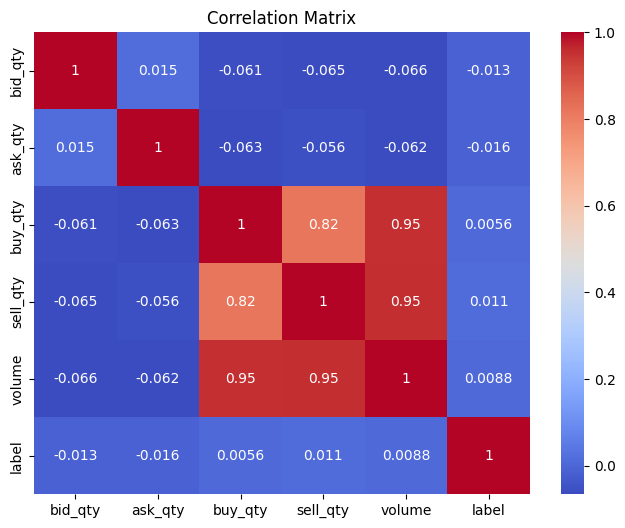

In [15]:
corr_matrix = df_train[public_features + ['label']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Time Series Analysis

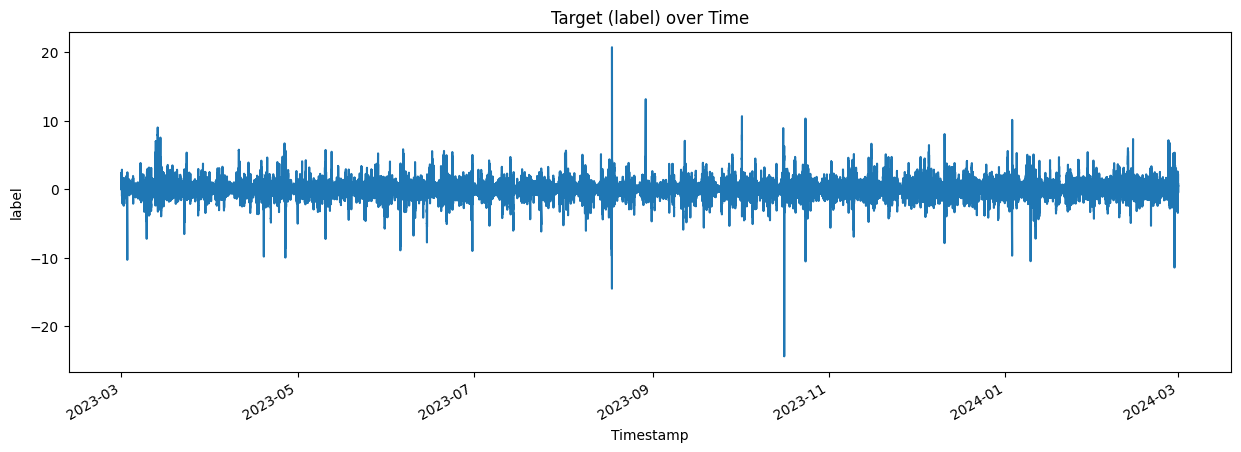

In [16]:

plt.figure(figsize=(15,5))
df_train['label'].plot()
plt.title('Target (label) over Time')
plt.xlabel('Timestamp')
plt.ylabel('label')
plt.show()


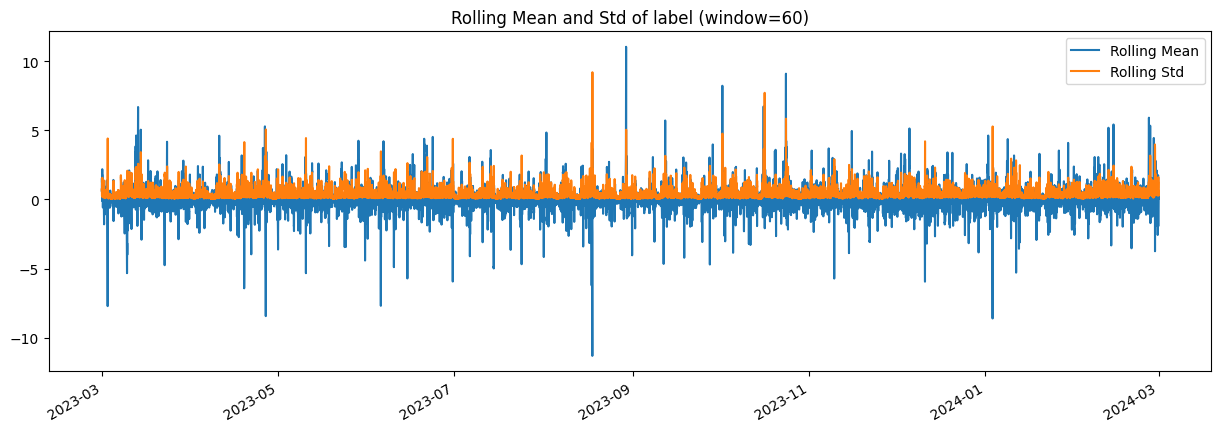

In [17]:
rolling_window = 60  # e.g., 60 minutes
plt.figure(figsize=(15,5))
df_train['label'].rolling(window=rolling_window).mean().plot(label='Rolling Mean')
df_train['label'].rolling(window=rolling_window).std().plot(label='Rolling Std')
plt.legend()
plt.title(f'Rolling Mean and Std of label (window={rolling_window})')
plt.show()


# Outlier Detection

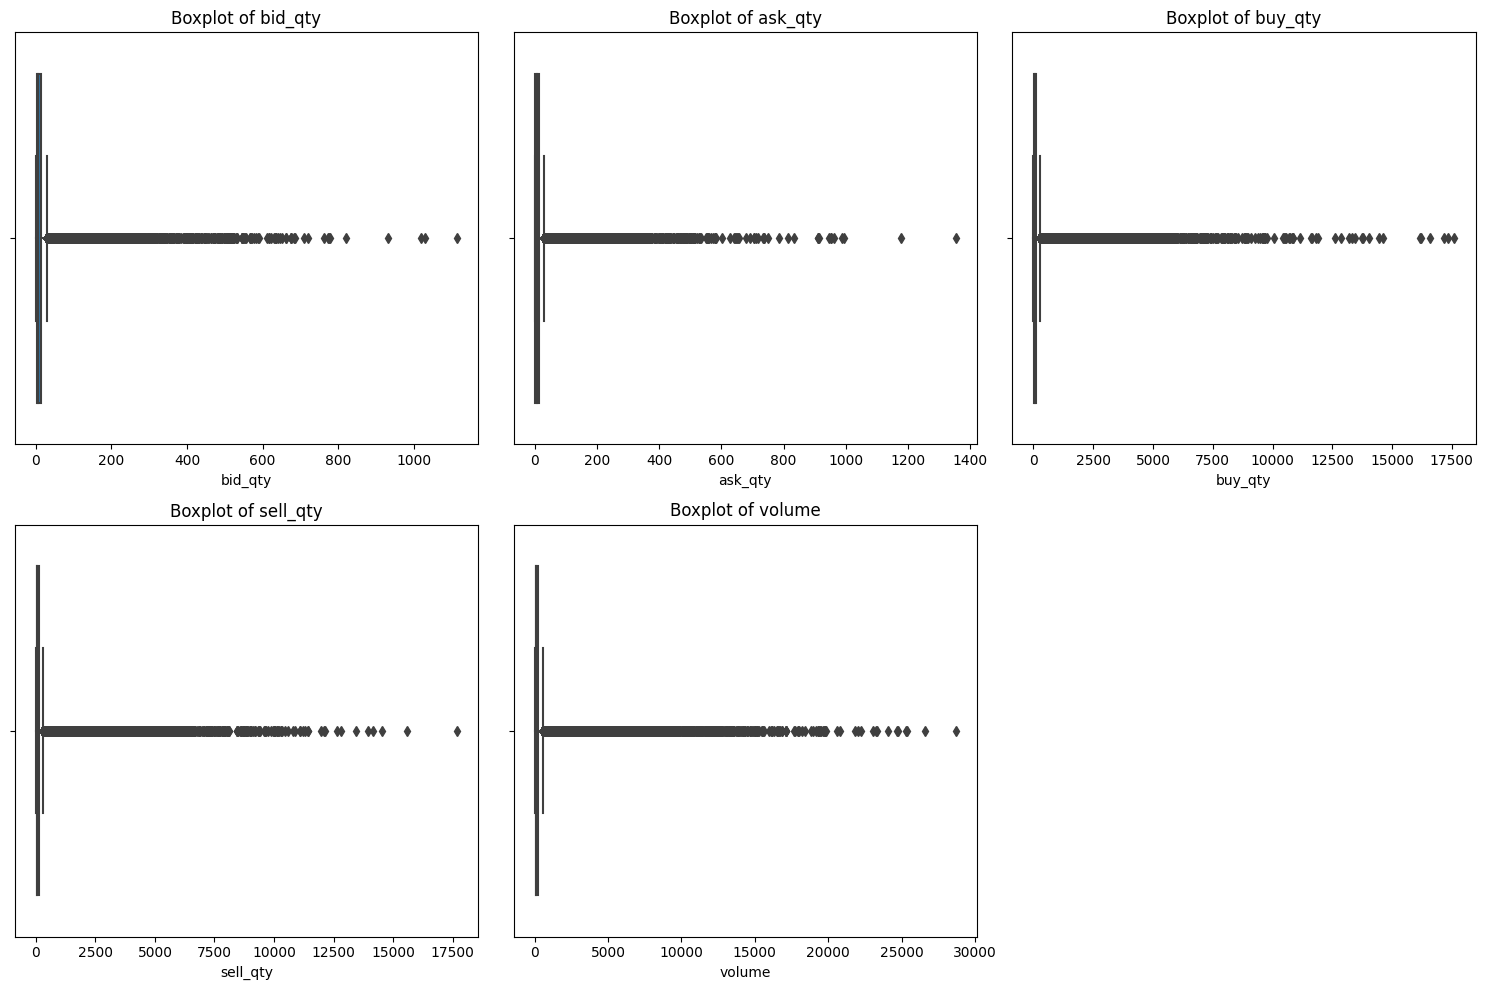

In [18]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(public_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_train[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import zscore

z_scores = zscore(df_train['volume'])
outliers = df_train[np.abs(z_scores) > 3]
print(f"Number of outliers in volume: {len(outliers)}")


Number of outliers in volume: 7010


In [20]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# Log-transform volume to reduce skewness
df_train['volume_log'] = np.log1p(df_train['volume'])

# Create outlier flag based on z-score
from scipy.stats import zscore
z_scores = zscore(df_train['volume'])
df_train['volume_outlier'] = (np.abs(z_scores) > 3).astype(int)

# Use RobustScaler for scaling
scaler = RobustScaler()
df_train['volume_scaled'] = scaler.fit_transform(df_train[['volume']])


In [21]:
for col in ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume']:
    df_train[f'{col}_log'] = np.log1p(df_train[col])

In [22]:
# Scale the log-transformed features:
scaler = RobustScaler()
for col in ['bid_qty_log', 'ask_qty_log', 'buy_qty_log', 'sell_qty_log', 'volume_log']:
    df_train[f'{col}_scaled'] = scaler.fit_transform(df_train[[col]])

In [23]:
# Log-transform

df_test['volume_log'] = np.log1p(df_test['volume'])

# Step 2: Create outlier flag (same as before)
test_z_scores = (df_test['volume'] - df_train['volume'].mean()) / df_train['volume'].std()
df_test['volume_outlier'] = (np.abs(test_z_scores) > 3).astype(int)

# Step 3: Apply scaler on the log-transformed volume (volume_log)
df_test['volume_scaled'] = scaler.transform(df_test[['volume_log']])



In [24]:
window_sizes = [5, 15, 60]  # Example windows in minutes

for feature in ['volume', 'bid_qty', 'ask_qty', 'buy_qty', 'sell_qty']:
    for window in window_sizes:
        df_train[f'{feature}_rollmean_{window}'] = df_train[feature].rolling(window).mean()
        df_train[f'{feature}_rollstd_{window}'] = df_train[feature].rolling(window).std()
        df_train[f'{feature}_lag_{window}'] = df_train[feature].shift(window)


In [25]:
df_train['label_rollstd_60'] = df_train['label'].rolling(60).std()


In [26]:
feature_cols = [col for col in df_train.columns if col not in ['label', 'timestamp', 'ID']]

# Filter to columns existing in both train and test
feature_cols = [col for col in feature_cols if col in df_test.columns]

X = df_train[feature_cols]
y = df_train['label']
X_test = df_test[feature_cols]



In [27]:
split_idx = int(len(df_train) * 0.8)
X_train, X_val = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_val = y.iloc[:split_idx], y.iloc[split_idx:]


In [28]:
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.398782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200680
[LightGBM] [Info] Number of data points in the train set: 420708, number of used features: 788
[LightGBM] [Info] Start training from score 0.025639


LGBMRegressor()

In [29]:
from scipy.stats import pearsonr
y_pred = model.predict(X_val)
corr, _ = pearsonr(y_val, y_pred)
print("Validation Pearson correlation:", corr)


Validation Pearson correlation: 0.06063254320222142


In [30]:
model.fit(X, y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.171002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200668
[LightGBM] [Info] Number of data points in the train set: 525886, number of used features: 788
[LightGBM] [Info] Start training from score 0.036126


LGBMRegressor()

In [31]:
test_preds = model.predict(X_test)


# Submission File

In [32]:
submission['label'] = test_preds
submission.to_csv('submission.csv', index=False)
